In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as cm
from scipy.integrate import cumulative_trapezoid
from scipy.interpolate import interp1d


In [15]:
df = pd.read_csv("SCPUnion2_mu_vs_z.txt", sep="\t", header=None, names=["object_name", "redshift", "magnitude", "error_magnitude"], skiprows=5)
df


,object_name,redshift,magnitude,error_magnitude
0,1993ah,0.028488,35.335551,0.226144
1,1993ag,0.050043,36.675442,0.167114
2,1993o,0.052926,36.816881,0.155866
3,1993b,0.070086,37.440321,0.158669
4,1992bs,0.062668,37.480331,0.156270
...,...,...,...,...
552,2001gn,1.124000,44.576403,0.198691
553,2001go,0.552000,42.530251,0.105933
554,2001gq,0.671000,42.991417,0.121927
555,2001gy,0.511000,42.388163,0.089912


<Axes: xlabel='redshift', ylabel='magnitude'>

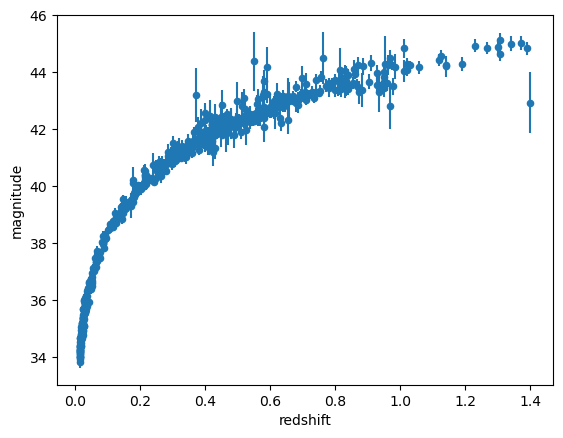

In [16]:
df.plot(x='redshift', y='magnitude', yerr='error_magnitude', kind='scatter')

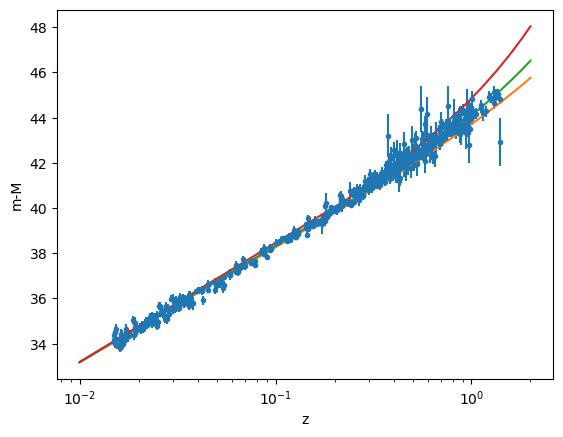

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


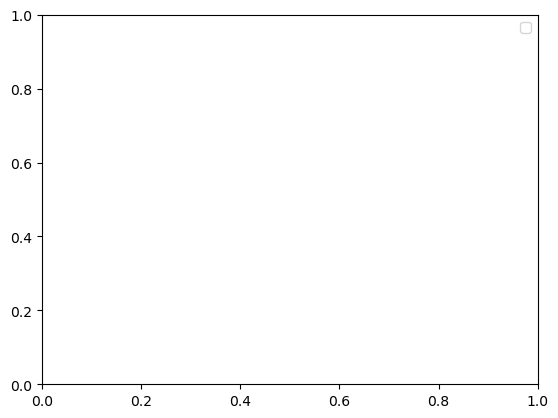

In [25]:
plt.errorbar(df['redshift'], df['magnitude'], yerr=df['error_magnitude'], fmt='.')
plt.xscale('log')
plt.xlabel("z")
plt.ylabel("m-M")


def distance_modulus(H0, z, q0):
    return 43.17 - 5 * np.log10(H0/(70 * z)) + 1.086 * (1 - q0) * z



x = np.linspace(0.01, 2, 10)

#log_x = np.log(x)

flat_matter = distance_modulus(70, x, 0.5)
plt.plot(x, flat_matter, label='flat_matter')

neg_curve_matter = distance_modulus(70, x, 0.15)
plt.plot(x, neg_curve_matter)

flat_matter_cosmo = distance_modulus(70, x, -0.55)
plt.plot(x, flat_matter_cosmo)
plt.show()


In [26]:
'''ax = df.plot(x='redshift', y='magnitude', yerr='error_magnitude', kind='scatter', marker='o', logx=True)

def distance_modulus(H0, z, q0):
    return 43.17 - 5 * np.log10(H0/(70 * z)) + 1.086 * (1 - q0) * z

#df['z_values'] = pd.Series(np.arange(0., 1, 1000))
'''
df['m-M_flat_matter'] = distance_modulus(70, df['redshift'], 0.5)
#df.regplot(x='redshift', y='m-M_flat_matter', logx=True, ax=ax)
print(df['m-M_flat_matter'])

df['m-M_neg_curve_matter'] = distance_modulus(70, df['redshift'], 0.15)
#df['m-M_neg_curve_matter'] = distance_modulus(70, df['z_values'], 0.15)
#df.plot(x='redshift', y='m-M_neg_curve_matter', logx=True, ax=ax)

df['m-M_flat_matter_cosmo'] = distance_modulus(70, df['redshift'], -0.55)
#df['m-M_flat_matter_cosmo'] = distance_modulus(70, df['z_values'], -0.55)
#df.plot(x='redshift', y='m-M_flat_matter_cosmo', logx=True, ax=ax)

'''
x = np.arange(0.001, 1, 1000)
log_x = np.log(x)
y = distance_modulus(70, x, 0.5)
plt.plot(log_x, y) #, logx=True, ax=ax)
plt.show()
'''


0      35.458779
1      36.693890
2      36.817084
3      37.436213
4      37.189258
         ...    
552    44.034164
553    42.179431
554    42.667966
555    41.989578
556    43.793476
Name: m-M_flat_matter, Length: 557, dtype: float64


'\nx = np.arange(0.001, 1, 1000)\nlog_x = np.log(x)\ny = distance_modulus(70, x, 0.5)\nplt.plot(log_x, y) #, logx=True, ax=ax)\nplt.show()\n'

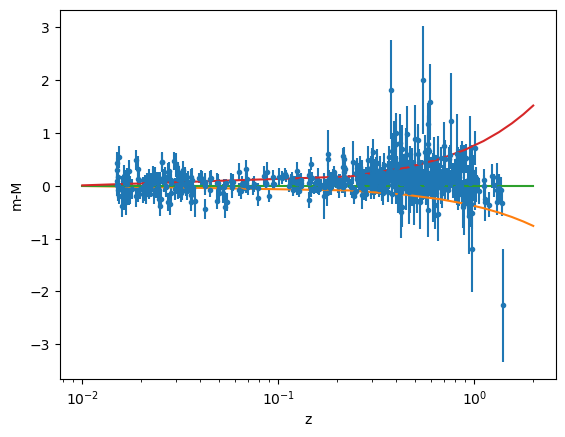

In [24]:
df['delta_dis_mod'] = df['magnitude'] - df['m-M_neg_curve_matter']

#ax1 = df.plot(x='redshift', y='delta_dis_mod', yerr='error_magnitude', kind='scatter', marker='o', logx=True)

df['delta_m-M_flat_matter'] = df['m-M_flat_matter'] - df['m-M_neg_curve_matter']
df['delta_m-M_neg_curve_matter'] = df['m-M_neg_curve_matter'] - df['m-M_neg_curve_matter']
df['delta_m-M_flat_matter_cosmo'] = df['m-M_flat_matter_cosmo'] - df['m-M_neg_curve_matter']

'''
df.plot(x='redshift', y='delta_m-M_flat_matter', logx=True, ax=ax1)

df.plot(x='redshift', y='delta_m-M_neg_curve_matter', logx=True, ax=ax1)

df.plot(x='redshift', y='delta_m-M_flat_matter_cosmo', logx=True, ax=ax1)
'''

plt.errorbar(df['redshift'], df['delta_dis_mod'], yerr=df['error_magnitude'], fmt='.')

plt.xscale('log')
plt.xlabel("z")
plt.ylabel("m-M")



x = np.linspace(0.01, 2, 10)
#log_x = np.log(x)

delta_flat_matter = flat_matter - neg_curve_matter
plt.plot(x, delta_flat_matter)

delta_neg_curve_matter = neg_curve_matter - neg_curve_matter
plt.plot(x, delta_neg_curve_matter)

delta_flat_matter_cosmo = flat_matter_cosmo - neg_curve_matter
plt.plot(x, delta_flat_matter_cosmo)




plt.show()

In [9]:
def chi_square(y_model, y, yerr):
    p = (y - y_model)**2/(yerr)**2
    return p


def model(omega_m, omega_lambda, H0, z):
    q0 = 0.5 * (omega_m * (1 + 3 * 0) + omega_lambda * (1 + 3 * (-1)))
    dis_mod = distance_modulus(H0, z, q0)
    return(dis_mod)


In [10]:
saveposteriors = []
save_i = []
save_j = []

nx, ny = (100, 100)

x = np.linspace(1.88, 1.92, nx) # omega_m
y = np.linspace(0.985, 1.005, ny)  # omega_lambda


z_array = df['redshift'].to_numpy()
mag_array =  df['magnitude'].to_numpy()
mag_err = df['error_magnitude'].to_numpy()

xv, yv = np.meshgrid(x, y, indexing='ij')

saveposteriors = np.zeros((nx, ny))

# a : omega_m
# b : omega_lambda

for i in range(nx):
    for j in range(ny):
        model1 = model(xv[i,j], yv[i,j], 70, z_array)
        post = chi_square(model1, mag_array, mag_err)
        saveposteriors[i][j] = post.sum()
        #saveposteriors.append(post)
        #save_j.append(j)
    #save_i.append(i)

'''
for i in x:
    for j in y:
        model1 = model(i, j, 70, z_array)
        post = chi_square(model1, mag_array, mag_err)
        saveposteriors.append(post)
        
'''

saveposteriors = np.array(saveposteriors)
save_i = np.array(save_i)
save_j = np.array(save_j)

'''

for i in x: 
    for j in y:
        model1 = model(i, j, 70, z_array)
        post = chi_square(model1, mag_array, mag_err)
        saveposteriors.append(post)


saveposteriors = np.array(saveposteriors)
#print(saveposteriors.shape)
'''

'\n\nfor i in x: \n    for j in y:\n        model1 = model(i, j, 70, z_array)\n        post = chi_square(model1, mag_array, mag_err)\n        saveposteriors.append(post)\n\n\nsaveposteriors = np.array(saveposteriors)\n#print(saveposteriors.shape)\n'

(100, 100)
(100, 100) (100, 100)
(100,)


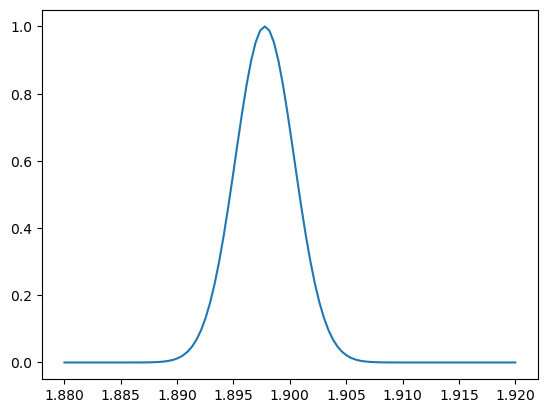

In [11]:
print(saveposteriors.shape)
#print(save_i.shape)
#print(save_j.shape)
print(xv.shape, yv.shape)


lp = saveposteriors.sum(axis=1)
print(lp.shape)
plt.plot(x, np.exp(-(lp-lp.min())))




(100,)


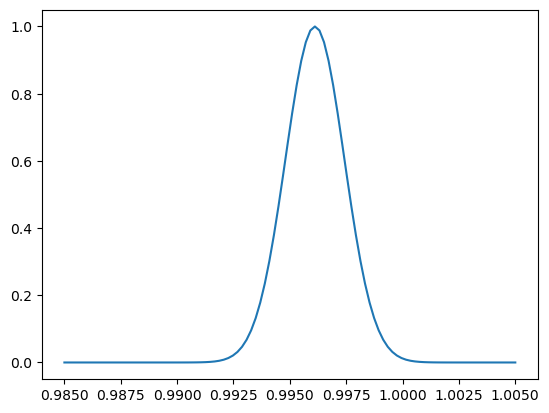

In [12]:
lp1 = saveposteriors.sum(axis=0)
print(lp1.shape)
plt.plot(y, np.exp(-(lp1-lp1.min())))


Text(0.5, 1.0, 'Simplest default with labels')

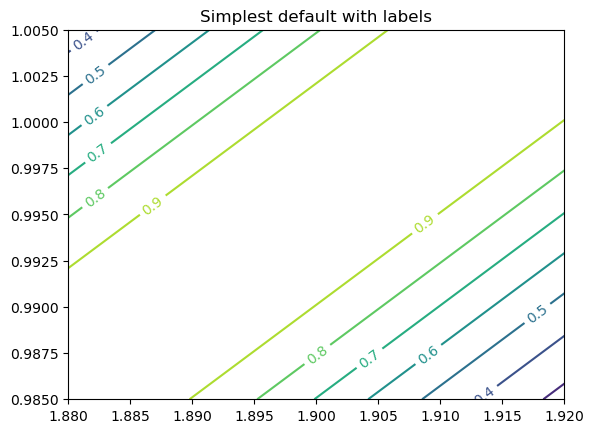

In [13]:
fig, ax = plt.subplots()
#CS = ax.contour(xv, yv, saveposteriors)
CS = ax.contour(xv, yv, np.exp(-(saveposteriors - saveposteriors.min())))
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (10000,)  and requested shape (100,)

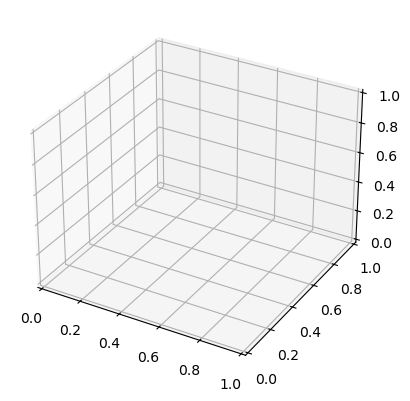

In [124]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax = plt.axes(projection='3d')
lp = saveposteriors.sum(axis=1)


ax.plot3D(x, y, lp, 'gray')


In [ ]:
#lp = saveposteriors.sum(axis=0)
#lp = np.sum(saveposteriors)
#print(lp.shape)

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x, y, saveposteriors, linewidth=0, antialiased=False)

plt.show()
#plt.plot(y, lp)
#plt.plot(x, np.exp(-(lp-lp.min())))


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1000000,)

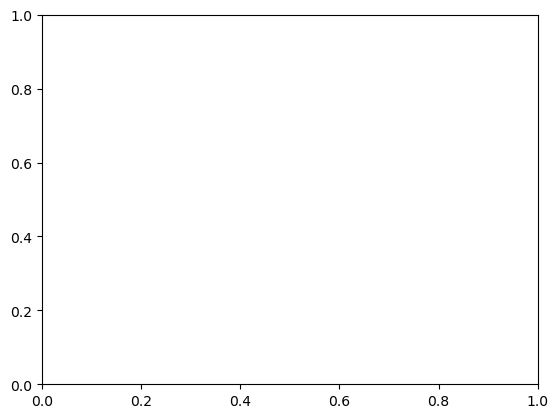

In [111]:
plt.plot(y, np.exp(-saveposteriors - saveposteriors.min()))
print(saveposteriors.min())

In [14]:
mask = df['redshift']<0.1

def chi_square(y_model):
    p = (df['magnitude'][mask] - y_model[mask])**2/(df['error_magnitude'][mask])**2
    return p.sum()

print(chi_square(df['m-M_flat_matter']))
print(chi_square(df['m-M_neg_curve_matter']))
print(chi_square(df['m-M_flat_matter_cosmo']))
print(mask.sum())


164.38113796694762
158.81855729417074
159.26633510655415
165


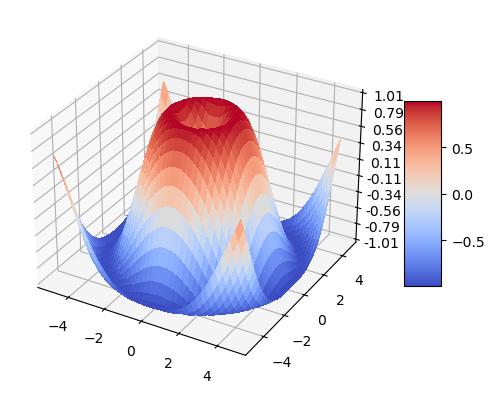

(40, 40) (40, 40) (40, 40)


In [31]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
print(X.shape, Y.shape, Z.shape)